# Задачи по численной оптимизации

Выполнила: Олохтонова Мария

Группа: НПМбд-01-19

## Одномерная оптимизация

№ 17.54

Методом золотого сечения найти точку минимума $x^*$ функции $f(x) = 2x +\frac{1}{x}$ на отрезке $[0,1]$ с точностью $ \varepsilon = 0.1$ 

In [1]:
import numpy as np
import math

In [2]:
def f(x):
    return 2*x + 1/x

In [3]:
def golden_ratio_search(a, b, f, e):
    Gr = (math.sqrt(5) + 1)/2 
    while abs(b - a) > e :
        x1 = b - (b - a)/Gr
        x2 = a + (b - a)/Gr
        if f(x1) < f(x2):
            b = x2
        else:
            a = x1
    return (b + a) / 2    

In [4]:
a = 0
b = 1
e = 0.1
x_min = golden_ratio_search(a, b, f, e)
f_min = f(x_min)
print('x_min =', x_min)
print('f_min =', f_min)


x_min = 0.7188470506254733
f_min = 2.8288106108476594


Аналитическое решение $f'(x) = 2 -\frac{1}{x^2} = 0$:

 $$ x^* = \sqrt{\frac{1}{2}} \approx 0.7071$$


## Многомерная оптимизация

1c примеры BD

метод наискорейшего спуска (одномерную задачу решаю методом ломаных) 

$ B: f(x,y) = (x-y^2)^2 + y^4 $

$ D: f(x,y) = 20(y-x^2)^2+(1-x)^2 $


In [5]:
def polyline_method (a, b, f, e):        
    # Численно оцениваем L
    L = 0
    xx_L = np.linspace(a,b,num=100)
    for i in range(len(xx_L) - 1):
        x1 = xx_L[i]
        x2 = xx_L[i + 1]
        l = abs(f(x1) - f(x2)) / abs(x1 - x2)
        if l > L:
            L = l
    
    # Точки испытаний
    xx = np.linspace(a,b,num=6)
    
    # Массив значений в точках испытаний
    fk = [f(x) for x in xx]
        
    while True:        
        fk_min = min(fk) # минимум функции в точках испытаний
        
        x_min = xx[0]
        maj_min = fk[0]
        index_min = 0
        
        for i in range(len(xx) - 1):
            # значение x и y в точках пересечения соседних ветвей миноранты
            x_mid = (L*xx[i]+L*xx[i+1]+fk[i]-fk[i+1])/(2*L)
            y_mid = fk[i]-L*(x_mid-xx[i])
            
            if y_mid < maj_min:                
                maj_min = y_mid
                index_min = i
                x_min = x_mid
        
        x_k1 = x_min

        # добавляем точку минимума миноранты и её значение к точкам испытаний
        xx = np.concatenate((xx[:index_min + 1], [x_k1], xx[index_min + 1:]))
        fk = np.concatenate((fk[:index_min + 1], [f(x_k1)], fk[index_min + 1:]))
        
        # условие остановки: малое изменение минимума функции
        if np.abs(fk_min - f(x_k1)) <= e:
            return x_k1, xx, L

In [6]:
def B(p):
    x = p[0]
    y = p[1]
    return (x-y**2)**2 + y**4

def D(p):
    x = p[0]
    y = p[1]
    return 20*(y-x**2)**2+(1-x)**2

def grad_B(p):
    x = p[0]
    y = p[1]
    return np.array([2*(x-y**2), 8*y**3-4*x*y])

def grad_D(p):
    x = p[0]
    y = p[1]
    return np.array([80*x**3-80*x*y+2*x-2, 40*y-40*x**2])

def gradient_descent(p0, e, f, grad_f):
    xk = p0 # начальное приближение
    points = []
    
    while True:
        points.append(xk)
        grad_value = grad_f(xk) # вычисляем значение градиента
        
        # минимизируемая функция
        def move(alpha):
            # значение целевой функции при движении вдоль антиградиента
            return f(xk - alpha * grad_value)
                
        # находим оптимальное значение alpha
        alpha, _, _ = polyline_method(0.001, 1, move, e)
        
        # производим свдиг
        xk1 = xk - alpha * grad_value
        
        # условие остановки
        norm = np.abs(f(xk1) - f(xk))
        
        if norm < e:
            return xk1, points
        else:
            xk = xk1

In [7]:
def g(x):
    return np.sin(x + 5) ** 2 + 2 * np.cos(x / 2 + 2)

x_min, points, L = polyline_method(0, 5, g, 0.0001)
values = g(points)
print('min_x, min_y =', x_min, g(x_min))

min_x, min_y = 1.4764812751042438 -1.8026006670442074


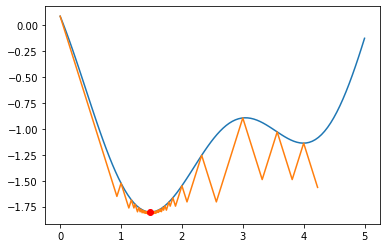

In [8]:
import matplotlib.pyplot as plt

xs_draw = np.linspace(0, 5, num=100)
ys_draw = g(xs_draw)

plt.plot(xs_draw, ys_draw)
segments_xs = []
segments_ys = []

for i in range(len(points) - 1):
    x = points[i]
    y = g(x)
    
    x_mid = (L*points[i]+L*points[i+1]+values[i]-values[i+1])/(2*L)
    y_mid = values[i]-L*(x_mid-points[i])
    
    segments_xs.append(x)
    segments_xs.append(x_mid)
    
    segments_ys.append(y)
    segments_ys.append(y_mid)
    
plt.plot(segments_xs, segments_ys)
plt.plot(x_min, g(x_min), 'ro')

min_x [ 0.00141658 -0.03795485]
min_ref [0, 0]


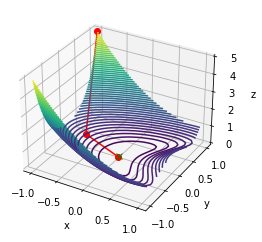

In [9]:
def f1(x, y):
    return (x-y**2)**2 + y**4

min_x, points = gradient_descent(np.array([-1,1]), 0.1, B, grad_B)
print('min_x', min_x)
print('min_ref', [0,0])
points_x = [p[0] for p in points]
points_y = [p[1] for p in points]
points_z = [B(p) for p in points]

x = np.linspace(-1, 1, 30)
y = np.linspace(-1, 1, 30)

X, Y = np.meshgrid(x, y)
Z = f1(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.plot(points_x, points_y, points_z, color='red', marker='o')
ax.plot(0, 0, 0, marker='x', color='green')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

min_x [0.67947733 0.46902099]
min_ref [1, 1]


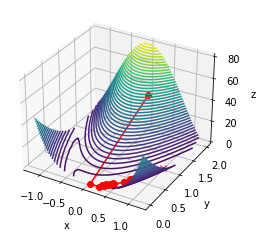

In [10]:
def f2(x, y):
    return 20*(y-x**2)**2+(1-x)**2

min_x, points = gradient_descent(np.array([0,2]), 0.001, D, grad_D)
print('min_x', min_x)
print('min_ref', [1,1])
points_x = [p[0] for p in points]
points_y = [p[1] for p in points]
points_z = [B(p) for p in points]

x = np.linspace(-1.2, 1.2, 30)
y = np.linspace(0, 2, 30)
X, Y = np.meshgrid(x, y)
Z = f2(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.plot(points_x, points_y, points_z, color='red', marker='o')
ax.plot(1, 1, 0, marker='x', color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');